<a href="https://colab.research.google.com/github/CRSpradlin/natural-language-processing-course/blob/main/NLP%20Course%20Work/6.%20Text%20Cleaning%20and%20Preprocessing/CompleteTextCleaningAndPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install beautifulsoup4
!pip install spacy
!python -m spacy download en_core_web_sm

!pip install wordcloud

!pip install textblob==0.17.1
!python -m textblob.download_corpora
!python -m textblob.download_corpora lite


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       d

In [5]:
import pandas as pd
import numpy as np
import spacy

In [6]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding = 'latin1')

In [8]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


## Goal: Preprocess This Data
This data has a lot of short handed statements that are not officially part of the English language. We need to clean the data so it can be processed in the most accurate way.

In [9]:
df['sentiment'].value_counts()

sentiment
0    2000
1    2000
Name: count, dtype: int64

## Word Counts

In [10]:
len('this is example text'.split())

4

In [11]:
# Caclulate the word count of the twitts column and apply that result to a new column in the data frame.
df['word_count'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [12]:
df.sample(5)

,twitts,sentiment,word_count
3441,@empirecityatl thanks I am keeping my head up,1,8
499,@andylar1 HELL NO... THEY GOT YOUR CELLY NUMBER!,0,8
1550,@TonyPepperFan not very funky,0,4
2697,"Back at home, and MARII is frikin here as in ...",1,16
2936,http://www.youtube.com/watch?v=5qYQrFKYFtU&amp...,1,10


In [13]:
df['word_count'].max()

32

In [14]:
df['word_count'].min()

1

In [15]:
#Calculates and returns the row results that only have a single word data content.
df[df['word_count']==1]

,twitts,sentiment,word_count
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


## Character Count

In [16]:
def char_count(text):
  s = text.split()
  s = ''.join(s)
  return len(s)

In [17]:
char_count('this test')

8

In [18]:
# Much like the word count, calculate the character count and add it to the data frame as a new column. (Without Spaces)
df['char_count'] = df['twitts'].apply(lambda x: char_count(str(x)))

In [19]:
df.sample(5)

,twitts,sentiment,word_count,char_count
174,ohhh 2 write bak 2 ppl u hav 2 put their names...,0,32,106
1530,"On my way 2 da pool party! Lost a lil weight, ...",0,15,58
1813,@eve76 me neither bubs,0,4,19
825,Going away to Korea for two months!! going to ...,0,19,76
1799,I think I drove on it too long http://twitpi...,0,9,47


## Average Word Length

In [20]:
x = 'this is an example' # 15/4 = ~3
y = 'this is another example' # 22/4 = ~5

In [21]:
df['avg_word_length'] = df['char_count']/df['word_count']

In [22]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length
756,gotta get some sleep first GCSE moch tomorrow!...,0,10,47,4.700000
1309,"I am awake and I dislike it. Sick as a dog, wo...",0,15,50,3.333333
1692,"@Person678 Keep trying, I grew one last year a...",0,23,90,3.913043
38,"Studying, cleaning and grocery shopping, all w...",0,12,67,5.583333
1061,"@acford I'm at home, working.",0,5,25,5.000000


## Stop Words Count
As a reminder, stop words are words that are so common in the English Language but do not provide very much sentiment as to what is being said. We want to remove these stop words but in some cases they can be useful (eg. can, cannot)

In [23]:
print(stopwords)

{'ten', 'beforehand', 'latterly', 'anyway', 'besides', 'more', '’m', 'me', 'such', 'every', 'show', 'off', 'are', 'beside', 'put', 'an', 'whence', 'already', 'forty', 'may', 'at', 'six', 'since', 'between', 'whatever', 'give', 'top', 'many', 'themselves', '’d', 'whether', 'becomes', 'them', 'two', 'others', 'therein', '‘d', 'behind', 'various', 'n‘t', 'third', 'who', 'whereupon', 'him', 'though', '‘ll', 'becoming', 'up', 'during', 'she', 'your', 'just', "'s", 'this', 'anyhow', 'used', 'wherever', 'down', 'one', 'should', 'four', 'keep', 'ca', 'around', 'further', 'unless', 're', '’s', 'hers', 'per', 'mine', '‘re', 'really', '’re', 'become', 'noone', 'toward', 'somehow', 'whose', 'afterwards', 'throughout', 'part', 'his', 'meanwhile', 'five', 'why', 'regarding', 'hereupon', 'sixty', '’ll', 'there', 'when', 'something', 'over', 'hundred', 'some', 'against', 'would', 'as', 'under', 'serious', 'from', 'upon', 'have', 'that', 'towards', 'herein', 'although', 'fifteen', 'of', 'out', 'wherein

In [24]:
len(stopwords)

326

In [25]:
x = 'this is an example'
words = x.split()
count = 0
for word in words:
  if word in stopwords:
    count += 1
print('Stopword count: ' + str(count))

Stopword count: 3


In [26]:
stopwords_count = lambda x: len([word for word in x.split() if word in stopwords])

In [27]:
df['stop_words_count'] = df.twitts.apply(stopwords_count)

In [28]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count
1716,i miss the sunshine,0,4,16,4.000000,2
1652,@Gunnar37 its not forever lol and for me tis h...,0,16,66,4.125000,7
3910,"np, looking forward to some geek tweets have ...",1,12,54,4.500000,4
3991,thinks that things are looking up,1,6,28,4.666667,3
2886,"thinks that mean, hateful people make the worl...",1,16,78,4.875000,7


## Count HashTags and Mentions (\#, @)

In [29]:
x = 'this is #hastag and this is @mention'
x.split()

['this', 'is', '#hastag', 'and', 'this', 'is', '@mention']

In [30]:
[word for word in x.split() if word.startswith('#') or word.startswith('@')]

['#hastag', '@mention']

In [31]:
df['hastags'] = df.twitts.apply(lambda x: len([word for word in x.split() if word.startswith('#')]))

In [32]:
df['mentions'] = df.twitts.apply(lambda x: len([word for word in x.split() if word.startswith('@')]))

In [33]:
df[df['mentions']>0].sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions
2736,@KKRSeattle @jmedero Either gonna be AC or P ...,1,15,73,4.866667,4,0,2
1151,@Jartuk I know dude. Very dissapointing.,0,6,35,5.833333,0,0,1
1313,@lipmag aww they shut down they've got stuff ...,0,13,57,4.384615,4,0,1
2022,@TownHallForHope So excited for Thursday. Was...,1,18,91,5.055556,7,0,1
1059,"@spbloom The Banks, ACMA &amp; AHTCC have been...",0,24,117,4.875000,6,0,1


In [34]:
df[df['hastags']>0].sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions
3017,"@AniinhaGriffin Love you too +.+, Little Poynt...",1,9,60,6.666667,2,1,1
2229,@TamarahLand I'm not looking for internship - ...,1,21,113,5.380952,7,1,1
3073,"@willcarling #goodwindup Nah, the Scandinavia...",1,17,121,7.117647,4,1,1
3409,@iggietoo Spry Samples: http://labs.adobe.co...,1,8,87,10.875000,1,1,1
2707,Learn how to 'Effectively Promote Your Shop' u...,1,17,113,6.647059,3,3,0


## If Numeric Digits are present in twitts

In [35]:
x = 'this is 1 and 2'
x.split()[2].isdigit()

True

In [36]:
[digit for digit in x.split() if digit.isdigit()]

['1', '2']

In [37]:
df['numeric_count'] = df.twitts.apply(lambda x: len([digit for digit in x.split() if digit.isdigit()]))

In [38]:
df[df['numeric_count']>0].sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count
1134,@SoDwn2Mars u are too much..chicken heads be q...,0,19,110,5.789474,7,0,1,1
1166,gotta write 15 pages about witches in the midd...,0,12,54,4.500000,4,0,0,1
1515,@Army_Wife4Life It did for a few minutes...She...,0,21,87,4.142857,11,0,1,3
1468,@LetsGoPat haha yeah gulo :O ano ba daw? i don...,0,30,107,3.566667,8,0,1,1
3805,Pic 11 is Gerri Halliwell isnt IT! didnt know ...,1,13,69,5.307692,3,0,0,1


## Uppercase Word Count

In [39]:
x = 'EXAMPLE ONE' #Uppercase usually means higher intensity emotion
y = 'example two'

print([word for word in x.split() if word.isupper()])
print([word for word in y.split() if word.isupper()])

['EXAMPLE', 'ONE']
[]


In [40]:
df['upper_count'] = df.twitts.apply(lambda x: len([word for word in x.split() if word.isupper()]))

In [41]:
df[df['upper_count']>0].sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count
3681,@LaceyJones I vote for a clone. That means mor...,1,17,66,3.882353,8,0,1,0,1
1654,@Ghostfreehood i want the top to stop spinning...,0,20,82,4.100000,8,0,1,0,1
303,"OQO, she is dead - such a shame as they looked...",0,15,77,5.133333,6,0,0,0,1
3656,"@FeliciaSlattery ease of use, better camera, s...",1,21,119,5.666667,5,0,1,0,1
35,"I was rollin' up Prince Ave, heard all the sir...",0,17,69,4.058824,7,0,0,0,1


## Lower Case Conversion

In [42]:
x = 'this is Text example'
x.lower() # text normalization

'this is text example'

In [43]:
x = 45.0
# x.lower() # This throws an error. "Float" object has no property "lower"
str(x).lower()

'45.0'

In [44]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())
# If you haven't noticed, we do this normalization after we have counted the upper_count.

In [45]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count
2213,@paulaaaron she did win! she is the grand pri...,1,17,66,3.882353,7,0,1,0,1
3764,on vacation!!!!!!!! on the flight to india....,1,7,40,5.714286,2,0,0,0,0
759,guess who's enjoying a slap-up breakfast on th...,0,19,117,6.157895,5,0,0,0,0
3682,enjoyed the movie &quot;up&quot; it was sooooo...,1,8,47,5.875000,3,0,0,0,0
1363,cannot get up this morn. must be the thought o...,0,20,75,3.750000,10,0,0,1,0


## Expansion of Contractions

In [46]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"u": " you ",
"ur": " your ",
"n": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'
}

In [47]:
x = "I'm don't he'll" # "I am", "do not", "he will"

In [48]:
def expand_contractions(text, contractions):
  words = text.split()
  for index, word in enumerate(words):
    lower = str(word).lower()
    if lower in contractions:
      words[index] = contractions[lower]
  return ' '.join(words)

In [49]:
expand_contractions(x, contractions)

'i am do not he will'

In [50]:
%%timeit
df['twitts'] = df.twitts.apply(lambda x: expand_contractions(x, contractions))

The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
57.9 ms ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count
3866,is really liking a certain muscle-y man ..oh l...,1,17,72,4.235294,7,0,0,0,1
2633,pink flowery background oh yeah!,1,5,28,5.600000,0,0,0,0,0
2180,@hanxcartwright hellz yeahhhh,1,3,27,9.000000,0,0,1,0,0
351,home. feel like i have had a sauna. in my clothes,0,10,38,3.800000,3,0,0,0,0
2007,@mz_kiss lol wassup mamasz,1,4,23,5.750000,0,0,1,0,2


You may need to manually update the contractions to include some instances of words/short-hand english that you may encounter and re-run you processing.

## Count and Removal of Emails

In [52]:
import regex as re
df['twitts'].str.contains('.com').sum()

336

In [53]:
df[df['twitts'].str.contains('gmail.com')]

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count
2448,"when i click my firefox 'most visited' tab, af...",1,17,79,4.647059,5,0,0,0,1


In [54]:
df[df['twitts'].str.contains('hotmail.com')]


,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count
3713,@securerecs arghh me please markbradbury_16@ho...,1,5,51,10.2,0,0,1,0,0


In [55]:
x = df.iloc[3713]['twitts']

In [56]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x)

['markbradbury_16@hotmail.com']

In [57]:
df['emails'] = df.twitts.apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [58]:
df['email_count'] = df.emails.apply(lambda x: len(x))

In [59]:
df[df['email_count']>0]

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count
3713,@securerecs arghh me please markbradbury_16@ho...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [60]:
df['twitts'] = df.twitts.apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))

In [61]:
df[df['email_count']>0]

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


## Count URLs and Remove Them

In [62]:
x = 'please visit https://google.com or ssh://something.terminal and take a look at ftp://yourdrive-cool.com/test/1/5?amount=all done'

In [63]:
re.findall(r'\S+://\S+', x)

['https://google.com',
 'ssh://something.terminal',
 'ftp://yourdrive-cool.com/test/1/5?amount=all']

In [64]:
df['urls'] = df.twitts.apply(lambda x: re.findall(r'\S+://\S+', x))

In [65]:
df['url_count'] = df.urls.apply(lambda x: len(x))

In [66]:
df[df['url_count']>0]

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count,urls,url_count
16,@brianquest i made 1 fo you 2: http://bit.ly/e...,0,19,81,4.263158,3,0,1,1,3,[],0,[http://bit.ly/eid8a],1
98,heading to work http://twitpic.com/4eojz,0,4,37,9.250000,1,0,0,0,0,[],0,[http://twitpic.com/4eojz],1
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,10,62,6.200000,4,0,1,0,0,[],0,[http://twitpic.com/4w8hk],1
144,i miss you ã¢ââ« http://blip.fm/~8lc2f,0,5,35,7.000000,1,0,0,0,2,[],0,[http://blip.fm/~8lc2f],1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000,0,0,0,0,0,[],0,[http://tumblr.com/xf825f012],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,118,5.900000,4,0,0,0,1,[],0,[http://staark.net/video.php],1
3826,http://tinyurl.com/kwmynq helmet - unsung to s...,1,9,76,8.444444,2,0,0,0,0,[],0,"[http://tinyurl.com/kwmynq, http://plurk.com/p...",2
3837,@r0ckergirl14 wow sweet again!! http://twitpic...,1,5,52,10.400000,0,0,1,0,0,[],0,[http://twitpic.com/69b67],1
3958,someone has been creative with my #deskmess wh...,1,13,91,7.000000,7,1,1,0,0,[],0,[http://twitpic.com/7jgf1],1


In [67]:
df['twitts'] = df.twitts.apply(lambda x: re.sub(r'\S+://\S+', '', x))

In [68]:
df[df['url_count']>0]

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count,urls,url_count
16,@brianquest i made 1 fo you 2: i tried but it...,0,19,81,4.263158,3,0,1,1,3,[],0,[http://bit.ly/eid8a],1
98,heading to work,0,4,37,9.250000,1,0,0,0,0,[],0,[http://twitpic.com/4eojz],1
99,@blondeblogger - i am so sad this is so blurry!,0,10,62,6.200000,4,0,1,0,0,[],0,[http://twitpic.com/4w8hk],1
144,i miss you ã¢ââ«,0,5,35,7.000000,1,0,0,0,2,[],0,[http://blip.fm/~8lc2f],1
183,photo: miss germany,0,4,44,11.000000,0,0,0,0,0,[],0,[http://tumblr.com/xf825f012],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,118,5.900000,4,0,0,0,1,[],0,[http://staark.net/video.php],1
3826,helmet - unsung to start your day,1,9,76,8.444444,2,0,0,0,0,[],0,"[http://tinyurl.com/kwmynq, http://plurk.com/p...",2
3837,@r0ckergirl14 wow sweet again!!,1,5,52,10.400000,0,0,1,0,0,[],0,[http://twitpic.com/69b67],1
3958,someone has been creative with my #deskmess wh...,1,13,91,7.000000,7,1,1,0,0,[],0,[http://twitpic.com/7jgf1],1


## Remove RT (Retweets)

In [69]:
df['twitts'].str.contains('rt ').sum()

109

In [70]:
x = 'rt @username: this is a test'

In [71]:
re.sub(r'rt ', '', x)

'@username: this is a test'

In [72]:
df['twitts'] = df.twitts.apply(lambda x: re.sub(r'rt ', '', x))

## Special/Punctuation Character Removal

In [73]:
x = '@crspradlin i was just testing....'

In [74]:
re.sub(r'[^\w\s]+', '', x)

'crspradlin i was just testing'

In [75]:
df['twitts'] = df.twitts.apply(lambda x: re.sub(r'[^\w\s]+', '', x))

In [76]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count,urls,url_count
3457,i am super excited for the iphone 30 software,1,9,40,4.444444,3,0,0,0,1,[],0,[],0
1213,so about how demi is playing in philly tonight...,0,14,54,3.857143,7,0,0,0,1,[],0,[],0
3182,going to shower then babysit xchange tommrow,1,7,40,5.714286,2,0,0,0,0,[],0,[],0
3637,suareasy let me tell you spending all you time...,1,24,100,4.166667,11,0,1,0,1,[],0,[],0
662,my wonderful napping plan has just been scrubb...,0,25,112,4.480000,8,0,0,0,2,[],0,[],0


## Remove Multiple Spaces

In [77]:
x = 'this    is  a      test '

In [78]:
' '.join(x.split())

'this is a test'

In [79]:
df['twitts'] = df.twitts.apply(lambda x: ' '.join(x.split()))

## Remove HTML Tags

In [80]:
from bs4 import BeautifulSoup

In [81]:
x = '<html><h1> This is a test </h1></html>'

In [82]:
BeautifulSoup(x, 'lxml').get_text().strip()

'This is a test'

In [83]:
%%time
df['twitts'] = df.twitts.apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

CPU times: user 1.19 s, sys: 5.07 ms, total: 1.19 s
Wall time: 1.58 s


In [84]:
x = 'Áccěntěd těxt'

In [85]:
import unicodedata

In [86]:
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore') # Normal Form Compose and Decompose
  return text

In [87]:
remove_accented_chars(x)

'Accented text'

In [88]:
df['twitts'] = df.twitts.apply(lambda x: remove_accented_chars(x))

## Remove Stop Words

In [89]:
x = 'this has some stop words'

In [90]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [91]:
df['twitts_no_stopwords'] = df.twitts.apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [92]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count,urls,url_count,twitts_no_stopwords
2988,jordanknight95 thats my guess,1,4,29,7.250000,1,0,1,0,0,[],0,[],0,jordanknight95 thats guess
2992,go go shohair again,1,5,19,3.800000,1,0,0,0,0,[],0,[],0,shohair
2520,brooklynnbreez do i need to make an appointmen...,1,10,49,4.900000,4,0,1,0,1,[],0,[],0,brooklynnbreez need appointment
2891,natasha i am sorry sometimes it works that way...,1,23,110,4.782609,10,0,1,0,0,[],0,[],0,natasha sorry works way butare sure looking br...
2643,were here well in adrian atleast,1,6,32,5.333333,2,0,0,0,0,[],0,[],0,adrian atleast


## Convert to Root or Base Word Form

In [93]:
nlp = spacy.load('en_core_web_sm')

In [94]:
x = 'those are chocolates. birds don\'t like them.'

In [95]:
def text_to_base(text):
  base_list = []
  doc = nlp(text)

  for token in doc:
    lemma = token.lemma_

    base_list.append(lemma)

  return ' '.join(base_list)

In [96]:
text_to_base(x)

'those be chocolate . bird do not like they .'

In [97]:
def text_to_base(text):
  base_list = []
  doc = nlp(text)

  for token in doc:
    lemma = token.lemma_

    if lemma == '-PRON-' or lemma == 'be':
      lemma = token.text

    base_list.append(lemma)

  return ' '.join(base_list)

In [98]:
text_to_base(x)

'those are chocolate . bird do not like they .'

In [99]:
df['twitts'] = df['twitts'].apply(lambda x: text_to_base(x))

In [100]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count,urls,url_count,twitts_no_stopwords
1958,uncleo awwww poor babymaybe its time to stablo...,0,10,53,5.300000,2,0,1,0,0,[],0,[],0,uncleo awwww poor babymaybe time stablockin haha
1909,sleep in a real bed well couch but its well th...,0,19,79,4.157895,10,0,0,0,0,[],0,[],0,sleeping real bed couch better car rocky mount...
3863,I do not need friend I can have a sweet ass ti...,1,14,50,3.571429,8,0,0,0,0,[],0,[],0,need friends sweet ass time
3138,play sim 3 for almost 6 hour now time for bed,1,11,41,3.727273,3,0,0,2,0,[],0,[],0,played sims 3 6 hours time bed
2624,larpe about,1,3,73,24.333333,1,0,0,0,0,[],0,[http://lecturesovercoffee.blogspot.com/2009/0...,1,larping


## Remove Common Words

In [101]:
x = 'this is this okay bye'

In [102]:
text = ' '.join(df['twitts'])
len(text)

272432

In [103]:
text = text.split()
len(text)

54098

In [104]:
word_freq = pd.Series(text).value_counts()

In [105]:
f20 = word_freq[:20]

In [106]:
f20

I       2947
to      1454
the     1296
a        961
you      906
not      890
is       871
my       823
it       733
and      729
have     665
do       613
in       566
for      520
of       475
am       473
go       469
that     455
get      451
on       422
Name: count, dtype: int64

These are the most frequent 20 words, which are almost all STOPWORDS.

In [107]:
df['twitts'] = df.twitts.apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [108]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count,urls,url_count,twitts_no_stopwords
79,no txtz itz cold home alone nothing,0,12,46,3.833333,0,0,0,0,0,[],0,[],0,got txtz itz cold home
3045,out minute make most sun,1,12,38,3.166667,9,0,0,0,0,[],0,[],0,going minute sun
1141,edythemighty sorry your dog sick,0,6,31,5.166667,2,0,1,0,0,[],0,[],0,edythemighty sorry dog sick
1518,princessilly sry all fun,0,10,41,4.100000,5,0,1,0,1,[],0,[],0,princessilly sry yall fun
1560,hate when song want listen mp3,0,14,43,3.071429,6,0,0,0,2,[],0,[],0,hate song want listen mp3


## Remove Rare Words

In [109]:
rare20 = word_freq.tail(20)

In [110]:
df['twitts'] = df.twitts.apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [111]:
df.sample(5)

,twitts,sentiment,word_count,char_count,avg_word_length,stop_words_count,hastags,mentions,numeric_count,upper_count,emails,email_count,urls,url_count,twitts_no_stopwords
3234,watch grey anatomyo how love mcdreamy mcsteamy,1,9,51,5.666667,2,0,0,0,1,[],0,[],0,watching greys anatomyo love mcdreamy mcsteamy
2740,okay cheat lil bitthat picture picture,1,14,72,5.142857,5,0,0,0,0,[],0,[http://twitpic.com/61dcj],1,okay cheated lil bitthats picture picture
3451,reinachango arrrr wish was there x,1,7,32,4.571429,3,0,1,0,0,[],0,[],0,reinachango arrrr wish x
3128,dpjoyce be at glastonbury unfortunately plus s...,1,17,82,4.823529,7,0,1,0,1,[],0,[],0,dpjoyce going glastonbury unfortunately plus w...
1282,hair bad today,0,5,16,3.200000,1,0,0,0,0,[],0,[],0,hair bad today


## Word Cloud Visualization

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
text = ' '.join(df['twitts'])

In [114]:
len(text)

218986

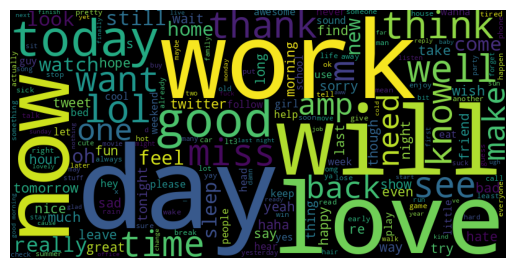

In [115]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction

In [116]:
from textblob import TextBlob

In [117]:
x = 'thannks for reeding this'

In [118]:
x = TextBlob(x).correct()
x

TextBlob("thanks for reading this")

## Tokenization using TextBlob

In [119]:
x = 'thanks#for#reading this'

In [120]:
TextBlob(x).words

WordList(['thanks', 'for', 'reading', 'this'])

In [121]:
doc = nlp(x)
for token in doc:
  print(token)

thanks#for#reading
this


## Detecting Nouns

In [122]:
x = 'Breaking News: President Donald Trump is looking to sign a new Bill into Law'

In [123]:
doc = nlp(x)
for noun in doc.noun_chunks:
  print(noun)

Breaking News
President Donald Trump
a new Bill
Law


## Language Tanslation and Detection

In [124]:
x

'Breaking News: President Donald Trump is looking to sign a new Bill into Law'

In [126]:
tb = TextBlob(x)
tb.translate(from_lang='en', to='es')

TextBlob("Noticias de última hora: el presidente Donald Trump está buscando firmar un nuevo proyecto de ley")

## TextBlob's Sentiment Classifier

In [127]:
from textblob.sentiments import NaiveBayesAnalyzer

In [128]:
x = 'we all stand together. we are going to win this game.'

In [129]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [132]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.6707392919721498, p_neg=0.32926070802785073)